In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ncyc = 10000
Nev = 3000
V_true = 0.3

prob_true = lambda x: 1+V_true*np.cos(2*np.pi*x)

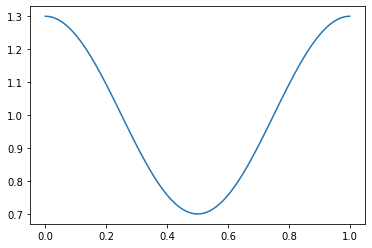

In [3]:
xar=np.linspace(0,1,100)
plt.plot(xar,prob_true(xar))

In [4]:
# First generate data by rejection sampling
events = []
prob_max = 1+V_true
while len(events)<Nev:
    while True:
        x=np.random.uniform(0,1)
        if prob_true(x)>=np.random.uniform(0,prob_max):
            events.append(x+np.random.randint(0,Ncyc))
            break
events=np.array(events)

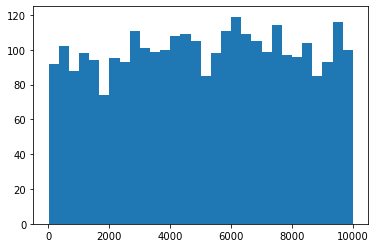

In [5]:
_=plt.hist(events,bins=30)

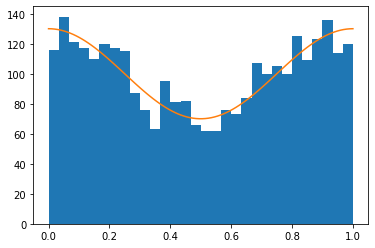

In [6]:
plt.hist(events%1,bins=30)
plt.plot(xar,prob_true(xar)*Nev/30)

In [7]:
import os
if os.path.isdir('chains'):
    os.system('rm -rf chains')
os.mkdir('chains')
from AprilMCMC.Parameter import Parameter
from AprilMCMC.BaseLikelihood import BaseLikelihood
from AprilMCMC.MCMCAnalyzer import  MCMCAnalyzer

class ZhiLike(BaseLikelihood):
    
    def __init__(self,events):
        BaseLikelihood.__init__(self,"astrometry")
        self.phi=0
        self.dfreq=0.00
        self.V=0.3
        self.events=events

    def freeParameters(self):
        return [Parameter("phi",0.0, err=1.0, bounds=(-np.pi,+np.pi)),
                Parameter("dfreq",0.0, err=0.05, bounds=(-0.3,0.3)),
                Parameter("V",0.3, err=0.1,bounds=(0,2.0))]

    def updateParams(self,params):
        for p in params:
            if p.name=="phi":
                self.phi=p.value
            elif p.name=="dfreq":
                self.dfreq=p.value
            elif p.name=="V":
                self.V=p.value

                
    def loglike_wprior(self):
        loglike = np.sum(np.log(1+self.V*np.cos((1+self.dfreq)*2*np.pi*self.events+self.phi)))
        return loglike

In [8]:
   
L=ZhiLike(events[:3000])
MCMCAnalyzer(L,"chains/test",temp=1, nsamp=30000)

Bounds: [-3.14159265 -0.3         0.        ] [3.14159265 0.3        2.        ]
Starting chain...
Still burning in, weight too large
907
Still burning in, weight too large
763
Still burning in, weight too large
1293
Still burning in, weight too large
1136
Still burning in, weight too large
145
Still burning in, weight too large
136
Still burning in, weight too large
2147
Still burning in, weight too large
359
Still burning in, weight too large
1200
Still burning in, weight too large
887
Still burning in, weight too large
1972
Still burning in, weight too large
345
Still burning in, weight too large
165
Still burning in, weight too large
154
Still burning in, weight too large
373
Still burning in, weight too large
886
Still burning in, weight too large
1756
Still burning in, weight too large
545
Still burning in, weight too large
58
Still burning in, weight too large
470
Still burning in, weight too large
258
Still burning in, weight too large
93
Still burning in, weight too large
175


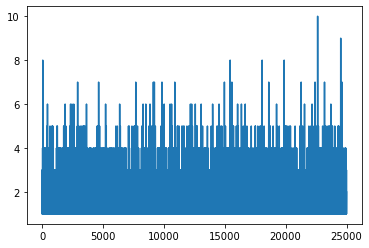

In [9]:
da=np.loadtxt('chains/test.txt')
plt.plot(da[:,0])

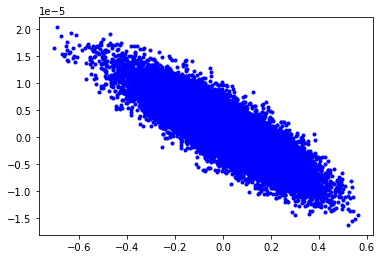

In [10]:
plt.plot(da[:,2],da[:,3],'b.')

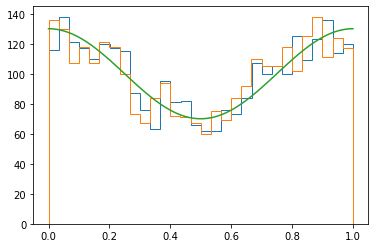

In [21]:
plt.hist(events%1,bins=30,histtype='step')
plt.hist((events%(1+1-5)-0.15/(2*np.pi))%(1+6e-6),bins=30,histtype='step')
plt.plot(xar,prob_true(xar)*Nev/30)

In [19]:
1e-5*10000*2*np.pi/2

0.3141592653589793

(array([11., 15., 14.,  8., 12., 14., 11., 10.,  9.,  9.,  3., 13.,  8.,
         6.,  7., 13.,  3.,  9.,  6., 11., 17.,  8.,  7.,  8., 12.,  6.,
        15., 10., 11., 14.]),
 array([0.00148378, 0.03475778, 0.06803178, 0.10130578, 0.13457978,
        0.16785378, 0.20112778, 0.23440178, 0.26767578, 0.30094978,
        0.33422378, 0.36749778, 0.40077178, 0.43404578, 0.46731978,
        0.50059378, 0.53386778, 0.56714178, 0.60041578, 0.63368978,
        0.66696378, 0.70023778, 0.73351178, 0.76678578, 0.80005978,
        0.83333378, 0.86660778, 0.89988178, 0.93315579, 0.96642979,
        0.99970379]),
 [<matplotlib.patches.Polygon at 0x7efef16a2af0>])

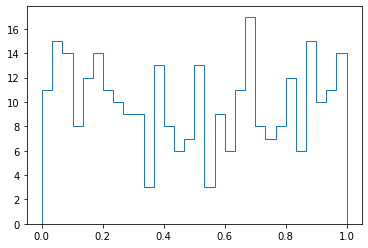

In [15]:
plt.hist(events[:300]%1,bins=30,histtype='step')

Bounds: [-3.14159265 -0.3         0.        ] [3.14159265 0.3        2.        ]
Starting chain...
Still burning in, weight too large
35
Still burning in, weight too large
65
Still burning in, weight too large
92
Still burning in, weight too large
90
Still burning in, weight too large
331
Still burning in, weight too large
278
Still burning in, weight too large
33
Still burning in, weight too large
56
Still burning in, weight too large
51
Still burning in, weight too large
45
Still burning in, weight too large
101
Still burning in, weight too large
162
Still burning in, weight too large
88
Still burning in, weight too large
116
Still burning in, weight too large
54
Still burning in, weight too large
39
Still burning in, weight too large
64
Still burning in, weight too large
87
Still burning in, weight too large
65
Still burning in, weight too large
67
Still burning in, weight too large
69
Still burning in, weight too large
47
Still burning in, weight too large
137
Still burning in, wei

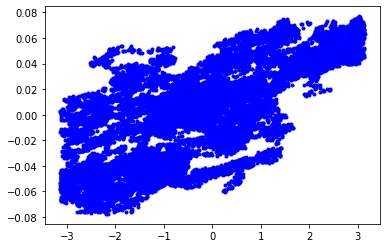

In [13]:
Ls=ZhiLike(events[:300])
os.system('rm chains/*small*')
MCMCAnalyzer(Ls,"chains/test_small",temp=1, nsamp=30000)
da=np.loadtxt('chains/test_small.txt')
plt.plot(da[:,2],da[:,3],'b.')

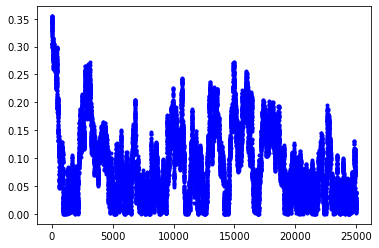

In [14]:
plt.plot(da[:,4],'b.')